In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt 
import csv

In [2]:
#load data from dataset
data = csv.DictReader(open("train.csv"))
data_labels, data_images = [], []

#split data into images and labels arrays
for row in data:
    data_labels.append(int(row["label"]))
    image = []
    for index in range(0, 28**2):
        image.append(int(row['pixel' + str(index)]))
    data_images.append(image)

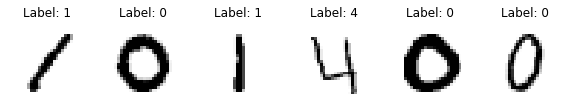

In [3]:
#Display some of the Images with their labels.

_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, img, label in zip(axes, data_images, data_labels):
    ax.set_axis_off()
    img = np.reshape(img, (28,28))
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label: %i" % label)

In [4]:
#Split the dataset into training and testing sets.
(X_train, X_test, y_train, y_test) = train_test_split(
    data_images, data_labels, test_size=0.5, random_state=42
)

In [ ]:
#find best value of k

ks = np.arange(2, 10)
scores = [] #accuracy scores for each value of k
for k in ks:
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model, X_train, y_train)
    score.mean()
    scores.append(score.mean())

#plot k vs accuracy
plt.plot(ks, scores)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [7]:
#k=3 was chosen for best accuracy
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [8]:
# Predict the value of the digits in the test set.
predicted = model.predict(X_test)

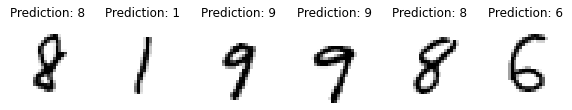

In [9]:
#Plot some of the prediction results with their images.
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, img, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    img = np.reshape(img, (28,28))
    ax.imshow(img, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion Matrix:


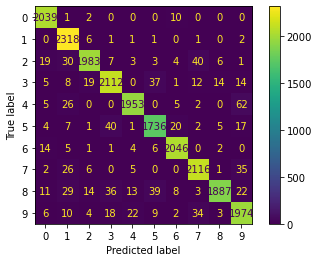

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2052
           1       0.94      0.99      0.97      2330
           2       0.97      0.95      0.96      2096
           3       0.95      0.95      0.95      2222
           4       0.98      0.95      0.96      2053
           5       0.95      0.95      0.95      1833
           6       0.98      0.98      0.98      2079
           7       0.96      0.97      0.96      2191
           8       0.98      0.92      0.95      2062
           9       0.93      0.95      0.94      2082

    accuracy                           0.96     21000
   macro avg       0.96      0.96      0.96     21000
weighted avg       0.96      0.96      0.96     21000



Accuracy: 0.9601904761904761


In [10]:
#Generate and display metrics
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

plot_confusion_matrix(model, X_test, y_test)
print("Confusion Matrix:")
plt.show()

report = classification_report(y_test, predicted)
print("Classification Report:",)
print (report)
print('\n')

acc = accuracy_score(y_test,predicted)
print("Accuracy:",acc)

In [11]:
#Classify an image from a file using the generated model.

from image_processing import process_image

test_img = process_image('image8.png')
print('Prediction is: ' + str(model.predict(test_img)[0]))

Prediction is: 8
